# Time Series 

In [29]:
#1.Downloada price time series using an API.The length of the time series T, with T = 300. 
%matplotlib inline
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np

start_sp = datetime.datetime(2021, 1, 4)
end_sp = datetime.datetime(2022, 3, 12)


TSLA = yf.download('TSLA',start_sp,end_sp)
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500
...,...,...,...,...,...,...
2022-03-07,285.433319,288.713318,268.190002,268.193329,268.193329,72494100
2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100
2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000


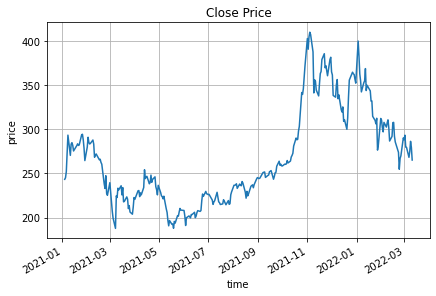

In [30]:
#2.Plot the price time series
close_tsla = TSLA["Close"]
close_tsla.plot() 
plt.tight_layout()
plt.title('Close Price')
plt.xlabel("time")
plt.ylabel("price")
plt.grid()
plt.show()

# Moving Averages

#3.Define mathematically the moving average of the price time series with an arbitrary time- window τ

Moving average is used to help smooth time series, so we can better predict long-term trends by ignoring short-term fluctuations. The mathematical expression is shown as follows, we denote $y_t$ as the stock price of a time series at time t, Simple Moving Average (SMA) computes the mean of the stock values in its time window $\tau$ with $y_0 = x_0$,
$$y_t = (x_t + x_{t-1}+ \cdots + x_{t-\tau+1})/\tau$$

\noindent Also, there are other types of moving averages of the price time series such as Exponential Moving Average (EMA).

In [31]:
#4.Compute three moving averages of the price time series, with time-windows τ=10,20,30
TSLA["Moving_Ave_10"] = close_tsla.rolling(window = 10).mean() 
TSLA["Moving_Ave_20"] = close_tsla.rolling(window = 20).mean()
TSLA["Moving_Ave_30"] = close_tsla.rolling(window = 30).mean()
TSLA

,Open,High,Low,Close,Adj Close,Volume,Moving_Ave_10,Moving_Ave_20,Moving_Ave_30
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,NaN,NaN,NaN
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,NaN,NaN,NaN
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,NaN,NaN,NaN
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,NaN,NaN,NaN
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-07,285.433319,288.713318,268.190002,268.193329,268.193329,72494100,276.435330,287.897664,292.480109
2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100,276.530997,286.515331,291.306775
2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000,279.695331,285.464830,290.646442


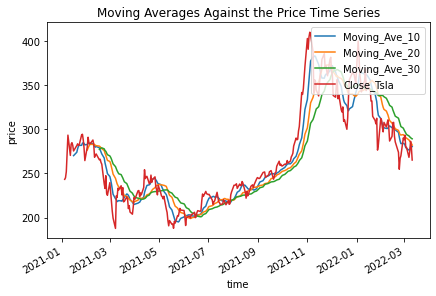

In [32]:
#5.Plot the moving averages against the price time series
TSLA["Moving_Ave_10"].plot()
TSLA["Moving_Ave_20"].plot()
TSLA["Moving_Ave_30"].plot()
close_tsla.plot()


plt.tight_layout()
plt.title('Moving Averages Against the Price Time Series')
plt.xlabel("time")
plt.ylabel("price")
plt.legend(("Moving_Ave_10","Moving_Ave_20","Moving_Ave_30","Close_Tsla"),loc = "upper right")
plt.show()

In [33]:
#6.Compute the linear return of the price time series
TSLA["Linear_return"] = close_tsla/close_tsla.shift(1)-1

# Compute the log-return of the price time series
TSLA["Log_return"] = np.log(close_tsla/close_tsla.shift(1))
TSLA

,Open,High,Low,Close,Adj Close,Volume,Moving_Ave_10,Moving_Ave_20,Moving_Ave_30,Linear_return,Log_return
Date,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,NaN,NaN,NaN,NaN,NaN
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,NaN,NaN,NaN,0.007317,0.007291
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,NaN,NaN,NaN,0.028390,0.027995
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,NaN,NaN,NaN,0.079447,0.076448
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,NaN,NaN,NaN,0.078403,0.075481
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,285.433319,288.713318,268.190002,268.193329,268.193329,72494100,276.435330,287.897664,292.480109,-0.040213,-0.041044
2022-03-08,265.176666,283.329987,260.723328,274.799988,274.799988,80399100,276.530997,286.515331,291.306775,0.024634,0.024335
2022-03-09,279.826660,286.853333,277.336670,286.323334,286.323334,59184000,279.695331,285.464830,290.646442,0.041934,0.041078


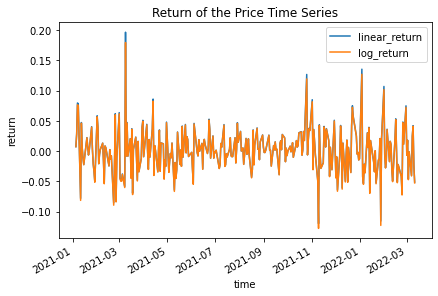

In [34]:
#7.Plot the linear return against the log-return time series
TSLA["Linear_return"].plot()
TSLA["Log_return"].plot()

plt.tight_layout()
plt.title('Return of the Price Time Series')
plt.xlabel("time")
plt.ylabel("return")
plt.legend(("linear_return","log_return"),loc = "upper right")
plt.show()

# Time Series Analysis

#8. Define the auto-correlation function (for a stationary time-series)

Let $y_t$ as the stock price of a time series at time t. The auto-correlation function refers to the degree of correlation between $y_t$ and $y_{t-h}$ for h = 1, 2, 3, etc. A stationary time series represents 
$sd(y_t) = sd(y_{t-h})$. Its formula can be written as $$ r(h) = cov(y_t,y_{t-h})/ var(y_t)$$ 

[1.         0.98129211 0.96373487 0.94817411 0.93314095 0.91920958
 0.90353652 0.88796039 0.86860846 0.8526013  0.83762057 0.82446802
 0.81402694 0.80011512 0.78849021 0.7779958  0.76556905 0.75428593
 0.74317743 0.72866688 0.71398109 0.70326885 0.69284585 0.68284267
 0.673492   0.65676706]


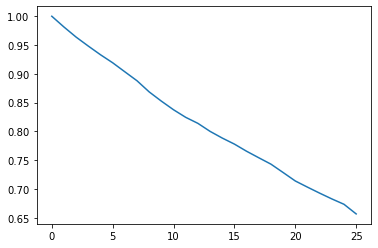

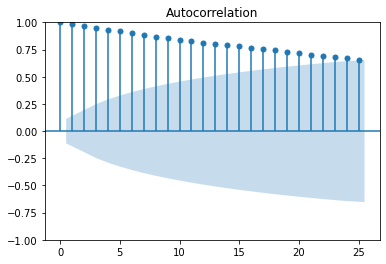

In [35]:
#9.Compute the auto-correlation function (ACF) of the price time series
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

acf_tsla = statsmodels.tsa.stattools.acf(close_tsla,nlags =25) 
print(acf_tsla)

#10. Plot the price ACF
plt.plot(acf_tsla)
plt.show()

#method #2
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(close_tsla, lags =25)
plt.show()

[ 1.          0.98457402  0.02668315  0.05662404  0.01278026  0.03306224
 -0.06169419 -0.00548181 -0.14368341  0.09306519  0.00881546  0.07176763
  0.08688191 -0.09046139  0.07059006  0.04108493 -0.0980378   0.02689796
 -0.00780871 -0.1488268   0.02651913  0.10046563  0.01046332  0.05667563
  0.00909609 -0.26258757]


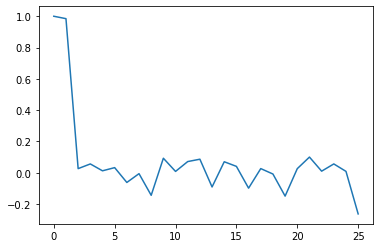

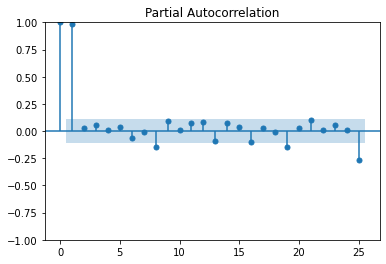

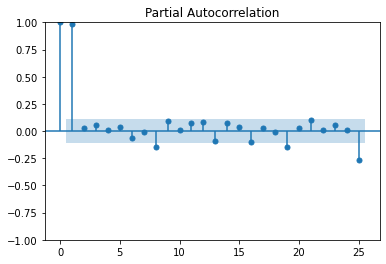

In [36]:
#11.Compute the partial auto-correlation function (PACF) of the price time series
    
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

pacf_tsla = statsmodels.tsa.stattools.pacf(close_tsla, nlags=25)
print(pacf_tsla)

#12. Plot the price PACF
plt.plot(pacf_tsla)
plt.show()

#method #2
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(TSLA["Close"],lags =25)

[ 1.         -0.04879509 -0.04181392 -0.00216588 -0.01688024 -0.03383581
  0.06580108  0.07126897 -0.05682688  0.00577977 -0.03856415 -0.09896429
  0.07124852 -0.08144237  0.00500823  0.06380091 -0.00980429 -0.03899653
  0.08353456 -0.00959117 -0.09929441  0.01640112 -0.02319028 -0.01991481
  0.20305798]


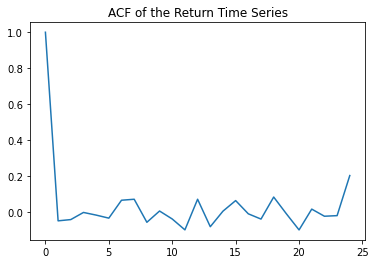

[ 1.         -0.04895883 -0.04459936 -0.00655294 -0.01952037 -0.03684445
  0.06221804  0.07700738 -0.04636541  0.00635694 -0.04217303 -0.10214159
  0.06083016 -0.10306234  0.00131668  0.0658891  -0.0100961  -0.01439656
  0.08804436 -0.01505806 -0.08201425 -0.01734074 -0.0509193  -0.00590681
  0.19995877]


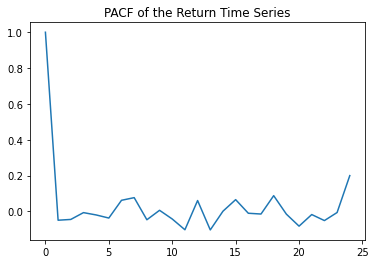

In [37]:
#13. Compute the auto-correlation function (ACF) of the return time series
r_tsla = close_tsla[1:]/close_tsla[:-1].values -1
r_acf_tsla = statsmodels.tsa.stattools.acf(r_tsla)
print(r_acf_tsla)

#14. Plot the return ACF
plt.plot(r_acf_tsla)
plt.title('ACF of the Return Time Series')
plt.show()

#15.Compute the partial auto-correlation function (PACF) of the return time series
pacf_tsla = statsmodels.tsa.stattools.pacf(r_tsla)
print(pacf_tsla)

#16.Plot the return PACF
plt.plot(pacf_tsla)
plt.title('PACF of the Return Time Series') 
plt.show()

# ARMA Models

#17. Define mathematically an ARMA(p,q) model

ARMA is a time series analysis model that combines AR model and MA model. It assumes the time series is stationary. ARMA(p,q) is defined by the following equation: 
$$
X_t=c+\varepsilon_t+\sum_{i=1}^p \varphi_i X_{t-i}+\sum_{i=1}^q \theta_i \varepsilon_{t-i}
$$
Where:
$p$ is the order of the autoregressive polynomial,
$q$ is the order of the moving average polynomial,
$\phi=$ the autoregressive model's parameters,
$\theta=$ the moving average model's parameters.
$\mathrm{c}=\mathrm{a}$ constant,
$\Sigma=$ summation notation,
$\varepsilon=$ error terms.

In [38]:

#18. Define a training and test set and fit an ARMA model to the price time series
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning 
warnings.simplefilter('ignore')

# test stationary kpss
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import kpss
kpss = kpss(close_tsla)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used"],columns=['value'])
output['value']['Test Statistic Value'] = kpss[0]
output['value']['p-value'] = kpss[1]
output['value']['Lags Used'] = kpss[2]
print(output)
                           
#Computes the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the null hypothesis that x is level or trend stationary.
#since p-value is smaller than 5%,so reject H0. not stationary.


                         value
Test Statistic Value  1.426872
p-value                   0.01
Lags Used                   10


In [50]:
# test how many times of difference we have to use to make it stationary 
import pmdarima
import pyramid
times = pmdarima.arima.ndiffs(close_tsla, alpha=0.05, test='kpss', max_d=2) 
print(times)

#Usually we can use function pyramid.arima.nsdiffs() to check wether we should do seasonal difference, but there we only
#have 300 data points, this is unnecessary.

# double check 
import pandas
new_close_tsla = pandas.DataFrame.diff(close_tsla).dropna() 

## ADF TEST stationary
from statsmodels.tsa.stattools import adfuller 
import pandas as pd

temp = np.array(new_close_tsla)
t = adfuller(temp)
output_2=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output_2['value']['Test Statistic Value'] = t[0]
output_2['value']['p-value'] = t[1]
output_2['value']['Lags Used'] = t[2]
output_2['value']['Number of Observations Used'] = t[3]
output_2['value']['Critical Value(1%)'] = t[4]['1%']
output_2['value']['Critical Value(5%)'] = t[4]['5%']
output_2['value']['Critical Value(10%)'] = t[4]['10%']
output_2
#Since the p-value is less than .05, we reject the null hypothesis, which means the time series is stationary.


1


,value
Test Statistic Value,-17.655192
p-value,0.0
Lags Used,0
Number of Observations Used,298
Critical Value(1%),-3.452486
Critical Value(5%),-2.871288
Critical Value(10%),-2.571964


In [39]:
# test p and q value
import pmdarima 
autoarima_model = pmdarima.auto_arima(close_tsla.values, start_p=0, start_q=0,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2250.288, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2252.038, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2252.010, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2248.303, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2253.637, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.203 seconds


In [51]:
# Define a training and test set
X = close_tsla.values
train, test = X[:len(X)-100], X[len(X)-100:]

#19.Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(train,order = (0,1,0)) 
model_fit = model.fit()

# print summary of fit model
# answer for question 18 fit arma model
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.forecast(steps=len(test)) 
train_predict = model_fit.predict(start=0,end=199)
error_test = mean_squared_error(test,predictions)
error_train = mean_squared_error(train,train_predict)
print('Test MSE: %.6f' % error_test)
print('Train MSE: %.6f' % error_train)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -682.388
Date:                Sun, 19 Feb 2023   AIC                           1366.776
Time:                        16:34:06   BIC                           1370.069
Sample:                             0   HQIC                          1368.108
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        55.7173      3.467     16.072      0.000      48.923      62.512
Ljung-Box (L1) (Q):                   1.79   Jarque-Bera (JB):                87.93
Prob(Q):                              0.18   Pr

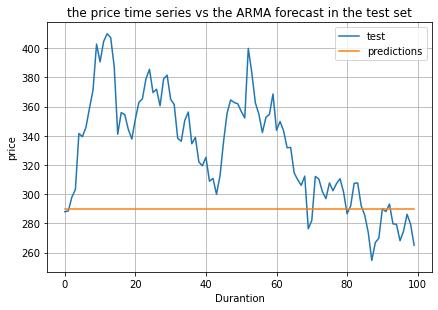

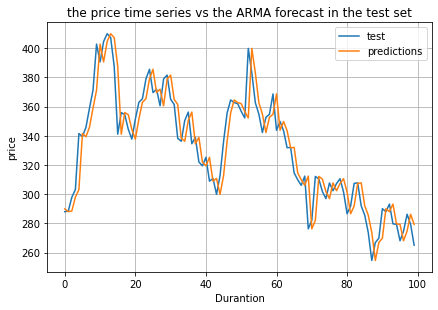

In [41]:
#20.Plot the price time series vs the ARMA forecast in the test set
plt.plot(test)
plt.plot(predictions)
plt.tight_layout()
plt.title('the price time series vs the ARMA forecast in the test set')
plt.xlabel("Durantion")
plt.ylabel("price")
plt.legend(("test","predictions"),loc = "upper right")
plt.grid()
plt.show()

# [improvment] a rolling forecast with the ARIMA model  
history = [x for x in train]
predictions_wf = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_wf.append(yhat)
    obs = test[t]
    history.append(obs)

#Plot the price time series vs the ARMA forecast in the test set
plt.plot(test)
plt.plot(predictions_wf)
plt.tight_layout()
plt.title('the price time series vs the ARMA forecast in the test set')
plt.xlabel("Durantion")
plt.ylabel("price")
plt.legend(("test","predictions"),loc = "upper right")
plt.grid()
plt.show()

In [42]:
#21.Fit an ARMA model to the return time series

#ADF TEST stationary
from statsmodels.tsa.stattools import adfuller
import pandas as pd

temp1 = np.array(r_tsla)
t_return = adfuller(temp1) 
output_3=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output_3['value']['Test Statistic Value'] = t_return[0]
output_3['value']['p-value'] = t_return[1]
output_3['value']['Lags Used'] = t_return[2]
output_3['value']['Number of Observations Used'] = t_return[3]
output_3['value']['Critical Value(1%)'] = t_return[4]['1%']
output_3['value']['Critical Value(5%)'] = t_return[4]['5%']
output_3['value']['Critical Value(10%)'] = t_return[4]['10%']
output_3

#Since the p-value is less than .05, we reject the null hypothesis, which means the time series is stationary.

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# p and q
parameters_r = statsmodels.tsa.stattools.arma_order_select_ic(r_tsla.values, max_ar=5, max_ma=5, ic=['aic', 'bic'])
print(parameters_r)

#22. Display the parameters of the model and its Mean Squared Error (MSE) in the training set and in the test set
Z = r_tsla.values
train_r, test_r = Z[:len(Z)-100], Z[len(Z)-100:]

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(train_r,order = (0,0,0))
model_fit_r = model.fit()

# print summary of fit model
print(model_fit_r.summary())
print('Coefficients: %s' % model_fit_r.params)

# make predictions
predictions_r = model_fit_r.forecast(steps=len(test_r))
train_predict_r = model_fit_r.fittedvalues
error_test_r = mean_squared_error(test_r,predictions_r)
error_train_r = mean_squared_error(train_r,train_predict_r )
print('Test MSE: %.3f' % error_test_r)
print('Train MSE: %.3f' % error_train_r)


{'aic':              0            1            2            3            4  \
0 -1127.707928 -1126.487308 -1125.056355 -1123.066266 -1121.130306   
1 -1126.423283 -1124.968508 -1123.024151 -1121.058277 -1119.101650   
2 -1125.018367 -1123.044854 -1124.252936 -1120.123837 -1118.143844   
3 -1123.031871 -1121.034205 -1119.048388 -1119.935160 -1115.727207   
4 -1121.148165 -1119.160312 -1117.145402 -1115.144748 -1114.816888   
5 -1119.563029 -1117.772465 -1117.529329 -1116.743266 -1116.073973   

             5  
0 -1119.311885  
1 -1117.177630  
2 -1116.395591  
3 -1113.713539  
4 -1116.446465  
5 -1112.372742  , 'bic':              0            1            2            3            4  \
0 -1120.307041 -1115.385977 -1110.254580 -1104.564048 -1098.927644   
1 -1115.321952 -1110.166733 -1104.521934 -1098.855615 -1093.198545   
2 -1110.216593 -1104.542637 -1102.050275 -1094.220732 -1088.540295   
3 -1104.529653 -1098.831544 -1093.145283 -1090.331612 -1082.423215   
4 -1098.945503 -1093.257

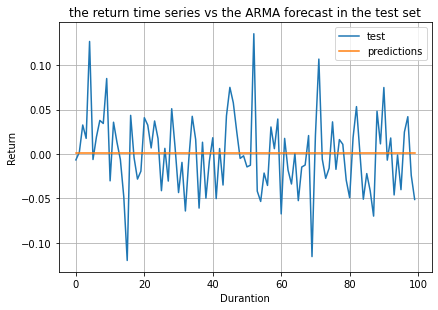

In [43]:
#23.Plot the return time series vs the ARMA forecast in the test set
plt.plot(test_r)
plt.plot(predictions_r)
plt.tight_layout()
plt.title('the return time series vs the ARMA forecast in the test set')
plt.xlabel("Durantion")
plt.ylabel("Return")
plt.legend(("test","predictions"),loc = "upper right")
plt.grid()
plt.show()

## Gaussianity and Stationarity test

#24. Introduce mathematically a Gaussianity test

Gaussianity test is also called Normality test, it is used to determine if the data set is followed by normal distribution. There are many different approaches can be used, but one common approach is to use a goodness-of-fit test, such as the Kolmogorov-Smirnov test. Kolmogorov-Smirnov test calculates the maximum difference (D) between the empirical CDF of the data and the theoretical CDF (we can assume it is normal distribution) and its null hypothesis is that the two distributions are identical. If the calculated value of D is less than the critical value, then the data is considered to be consistent with a normal distribution. 

In [44]:
#25. Perform a Gaussianity test of the return time series

#Shapiro-Wilk test
import scipy

sk = scipy.stats.shapiro(r_tsla.values)
sk_stat, sk_p_value = sk
if sk_p_value < 0.05:
    print("The return time series do not follow a normal distribution.")
else:
    print("The return time series follows a normal distribution")
    
# Kolmogorov Smirnov test
import numpy as np
import scipy.stats as stats

stats.kstest(r_tsla.values,'norm')
# The null hypothesis (H0) is that the distribution of which your data is a sample is equal 
# to the standard normal distribution (0,1). p-vlue is extrem small,so it does not follow standard normal distribution

The return time series do not follow a normal distribution.


KstestResult(statistic=0.459243597229439, pvalue=3.345521960643134e-58)

#26. Introduce mathematically a stationarity test

A stationarity test is to determine if a time series is stationary or non-stationary. A stationary time series means its variance, and autocorrelation remains constant over time. The most popular method to test stationary is Unit root tests and Augmented Dickey-Fuller (ADF) test is one of the most commonly used unit root tests. 

\noindent Augmented Dickey-Fuller (ADF) test is defined as following. Consider an autoregressive process of order $p$ :
$$
y_t=\phi_1 y_{t-1}+\cdots+\phi_p y_{t-p}+\epsilon_t
$$
The characteristic equation is defined as:
$$
\phi(m)=m^p-\sum_{k=1}^p m^{p-k} \phi_k=0
$$
It can be demonstrated that if $m=1$ is a root, then the time series is not stationary and vice versa.

In [45]:
#27. Perform a stationarity test of the return time series
#ADF TEST stationary
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

temp1 = np.array(r_tsla)
t_return = adfuller(temp1) 
output_3=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output_3['value']['Test Statistic Value'] = t_return[0]
output_3['value']['p-value'] = t_return[1]
output_3['value']['Lags Used'] = t_return[2]
output_3['value']['Number of Observations Used'] = t_return[3]
output_3['value']['Critical Value(1%)'] = t_return[4]['1%']
output_3['value']['Critical Value(5%)'] = t_return[4]['5%']
output_3['value']['Critical Value(10%)'] = t_return[4]['10%']
output_3

#Since the p-value is less than .05, we reject the null hypothesis, which means the time series is stationary.


,value
Test Statistic Value,-18.010315
p-value,0.0
Lags Used,0
Number of Observations Used,298
Critical Value(1%),-3.452486
Critical Value(5%),-2.871288
Critical Value(10%),-2.571964
